# Assignment 2
# Classification with Scikit-Learn

## Deadline: Thursday, October 12 at 8:00 PM
## The assignment must be submitted in the form of a Jupyter notebook and uploaded to eClass.

During this assignment, you will work with a dataset to predict if a patient has heart disease or is normal. It is a binary classification problem. The dataset is the same dataset as for assignment 1, but you do not need to use any code from assignment 1 to solve this assignment. This is based on the following Kaggle example, which you are free to examine: https://www.kaggle.com/code/pasanjayaweera/you-stole-my-heart-w-python

## Marks:
- Step 1. Load the data and create a feature matrix and a target array. 1 mark. (It is not required to filter or impute any data values. But optionally you may use your code from assignment 1 to do so here, but it is not required to do so to receive full marks.)
- Step 2. Create training and test sets. 1 mark.
- For the next three steps, select three different machine learning classifiers implemented in Scikit-Learn. You can select from linear perceptron classifier, logistic regression classifier, any type of support vector classifiers (including with the kernel trick), a decision tree and/or a random forest). You may also use any other classifier introduced in the course.
- Step 3. Train the first model, then evaluate the performance using at least accuracy, specificity and sensitivity (or recall). Visualize the confusion matrix (with Matplotlib or Seaborn). 2 marks.
- Step 4. Repeat step 3 for the second model. 2 marks.
- Step 5. Repeat step 3 for the third model. 2 marks.
- Step 6. Provide a brief discussion on why you selected particular models, how the performance varied between models, which model you believe is the most generalizable, and any issues or problems you encountered during the assignment (200 words max). 2 mark.
- Total = 10 marks.

## Notes:
This notebook is structured as a series of steps. Earlier steps must be completed before later steps for the code to run. Some partial code is provided; your solution should use that partial code. The solution doesn't need to be pretty! Make sure the code runs without errors. Some required imports will be provided for you; you will need additional imports from sklearn. You may need to check with the documentation for Scikit-Learn or other Python packages. There are multiple solutions for most tasks. You may need to use non-default input parameters for some classifiers to work with this dataset.

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# This code will download the data file from GitHub.

import requests

def download_data(source, dest):
    base_url = 'https://raw.githubusercontent.com/'
    owner = 'MaralAminpour'
    repo = 'ML-BME-Course-UofA-Fall-2023'
    branch = 'main'
    url = '{}/{}/{}/{}/{}'.format(base_url, owner, repo, branch, source)
    r = requests.get(url)
    f = open(dest, 'wb')
    f.write(r.content)
    f.close()

download_data('Assignments/data/heart.csv', 'heart.csv')

## Data dictionary

The following data dictionary is provided. Note that unlike in Assignment 1, you can use the full set of features. There are 11 features.

  1. Age - Age of the Patient - **Numerical**
  2. Sex - Gender of the Patient - **Categorical**
        * M - Male
        * F - Female
  3. ChestPainType - Chest Pain Type - **Categorical**
        * TA - [Typical Angina](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5680106) - Substernal chest pain precipitated by physical exertion or emotional stress
        * ATA - [ATypical Angina](https://www.ncbi.nlm.nih.gov/medgen/149267) Angina pectoris which does not have associated classical symptoms of chest pain. Symptoms - weakness, nausea, or sweating
        * NAP - [Non-Anginal Chest Pain](https://my.clevelandclinic.org/health/diseases/15851-gerd-non-cardiac-chest-pain) - Pain in the chest that is NOT caused by Heart Disease or Heart Attack
        * ASY - [Asymptomatic](https://www.mayoclinic.org/diseases-conditions/heart-attack/expert-answers/silent-heart-attack/faq-20057777) - No symptoms
  4. RestingBP - [Resting Blood Pressure (mm/Hg)](https://www.medicinenet.com/blood_pressure_chart_reading_by_age/article.htm) - **Numerical**
  5. Cholesterol - [Serum Cholesterol (mm/dl)](https://www.medicalnewstoday.com/articles/321519) - **Numerical**
  6. FastingBS - [Fasting Blood Sugar](https://www.mayoclinic.org/diseases-conditions/diabetes/diagnosis-treatment/drc-20371451) - **Categorical (1: if FastingBS > 120 mg/dl, 0: otherwise)**
  7. RestingECG - Resting ElectroCardiogram Results - **Categorical**
        * Normal - [Normal ECG Reading](https://ecgwaves.com/topic/ecg-normal-p-wave-qrs-complex-st-segment-t-wave-j-point/) 
        * ST - [Abnormality in ST-T Wave Part of ECG](https://www.healio.com/cardiology/learn-the-heart/ecg-review/ecg-interpretation-tutorial/68-causes-of-t-wave-st-segment-abnormalities) 
        * LVH - [Probable or definite Left Ventricular hypertrophy](https://www.healio.com/cardiology/learn-the-heart/ecg-review/ecg-interpretation-tutorial/68-causes-of-t-wave-st-segment-abnormalities) 
  8. MaxHR - Maximum Heart Rate Achieved (60-202) - **Numeric**
  9. ExerciseAngina - [Exercise Induced Angina](https://www.mayoclinic.org/diseases-conditions/angina/symptoms-causes/syc-20369373) - When your heart wants more blood, but narrowed arteries slow down the blood flow - **Categorical (Yes/No)**
  10. Oldpeak - [ST Depression](https://en.wikipedia.org/wiki/ST_depression) - **Numerical**
  11. ST_Slope - [Slope](https://pubmed.ncbi.nlm.nih.gov/3739881/) of the peak exercise ST Segment - **Categorical**
        * Up - Upward Slope
        * Flat - Slope is zero
        * Down - Downward Slope
  12. HeartDisease - Output Class - **Categorical (1: Heart Disease, 0: Normal)**

In [3]:
# Step 1. Load the data and create a feature matrix and a target array. 1 mark.
#   (It is not required to filter or impute any data values. 
#   But optionally you may use your code from assignment 1 to do so here, 
#   but it is not required to do so to receive full marks.)

# The downloaded file heart.csv contains data in a CSV (comma-separated values) formatted text file.

heart_data = pd.read_csv('heart.csv')
heart_data.head()

# For the categorical values, it is recommended to use one-hot encoding.
# You can use code similar to the following to one-hot encode the categorical values as one-hot values:
# X = heart_data.get_dummies(X, columns=['ColumnName1', 'ColumnName2'], drop_first=True)

# Add your code here.

# Version 1
# From assignment 1
#X = heart_data[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]
#y = heart_data[['HeartDisease']]

# Version 2
# From you stole my heart
X = heart_data.iloc[:,0:-1]
y = heart_data.iloc[:,-1]
X = pd.get_dummies(X, columns=['Sex', 'ChestPainType', 'FastingBS',
                                       'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)

# Version 3
# From class notebooks
#heart_data_array = heart_data.to_numpy()
#X = heart_data_array[:,0:-1]
#y = heart_data_array[:,-1]

print('X.shape =', X.shape)
print('y.shape =', y.shape)

X.shape = (918, 15)
y.shape = (918,)


In [4]:
# Step 2. Create training and test sets. 1 mark.

# Add your code here.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

print('X_train.shape =', X_train.shape)
print('X_test.shape =', X_test.shape)
print('y_train.shape =', y_train.shape)
print('y_test.shape =', y_test.shape)

X_train.shape = (734, 15)
X_test.shape = (184, 15)
y_train.shape = (734,)
y_test.shape = (184,)


- For the next three steps, select three different machine learning classifiers implemented in Scikit-Learn. You can select from linear perceptron classifier, logistic regression classifier, any type of support vector classifiers (including with the kernel trick), a decision tree and/or a random forest). You may also use any other classifier introduced in the course.


In [5]:
# Helper function to evaluate the models; the students can use a similar function,
#   or simply replicate the code
def EvaluateModel(model, X_train, X_test, y_train, y_test):

    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    
    # Calculate and print classification report for the training set
    y_train_pred = model.predict(X_train)
    print('Classification report for training set:')
    print(classification_report(y_train, y_train_pred))

    # Calculate and print classification report for the test set
    y_test_pred = model.predict(X_test)
    print('Classfication report for test set:')
    print(classification_report(y_test, y_test_pred))

    plt.figure(figsize=(6,3))

    # Display the confusion matrix for the training set
    plt.subplot(121)
    cm_train = confusion_matrix(y_train, y_train_pred)
    sns.heatmap(cm_train, annot=True)
    plt.title('Training set')
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
   
    # Display the confusion matrix for the test set
    plt.subplot(122)
    cm_test = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cm_test, annot=True)
    plt.title('Test set')
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
   
    plt.tight_layout()
    plt.show()

Classification report for training set:
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       333
           1       0.83      0.89      0.86       401

    accuracy                           0.84       734
   macro avg       0.84      0.84      0.84       734
weighted avg       0.84      0.84      0.84       734

Classfication report for test set:
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        77
           1       0.81      0.85      0.83       107

    accuracy                           0.79       184
   macro avg       0.79      0.78      0.79       184
weighted avg       0.79      0.79      0.79       184



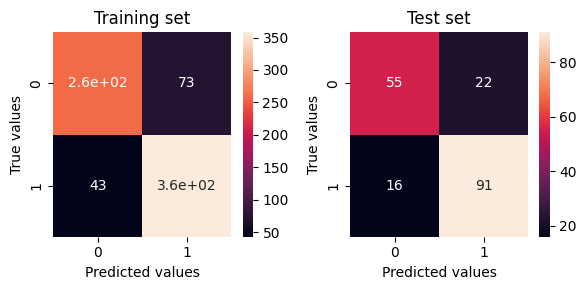

In [6]:
# Step 3. Train the first model, then evaluate the performance using at least accuracy, 
#   sensitivity (a.k.a. recall on class = 1) and specificity (a.k.a. recall for classs 0).
#   Display the confusion matrix. 2 marks.

# Add your code here.

from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
forest_model.fit(X_train, y_train)
EvaluateModel(forest_model, X_train, X_test, y_train, y_test)

Classification report for training set:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       333
           1       0.89      0.91      0.90       401

    accuracy                           0.88       734
   macro avg       0.88      0.88      0.88       734
weighted avg       0.88      0.88      0.88       734

Classfication report for test set:
              precision    recall  f1-score   support

           0       0.85      0.74      0.79        77
           1       0.83      0.91      0.87       107

    accuracy                           0.84       184
   macro avg       0.84      0.82      0.83       184
weighted avg       0.84      0.84      0.83       184



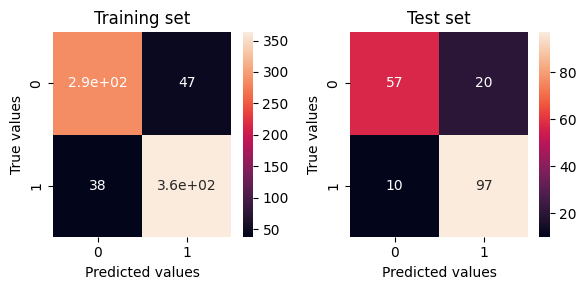

In [7]:
# Step 4. Repeat step 3 for the second model. 2 marks.

# Add your code here.

from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(max_iter=1000, random_state=0)
logreg_model.fit(X_train, y_train)
EvaluateModel(logreg_model, X_train, X_test, y_train, y_test)

Classification report for training set:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       333
           1       0.88      0.90      0.89       401

    accuracy                           0.88       734
   macro avg       0.88      0.88      0.88       734
weighted avg       0.88      0.88      0.88       734

Classfication report for test set:
              precision    recall  f1-score   support

           0       0.85      0.74      0.79        77
           1       0.83      0.91      0.87       107

    accuracy                           0.84       184
   macro avg       0.84      0.82      0.83       184
weighted avg       0.84      0.84      0.83       184



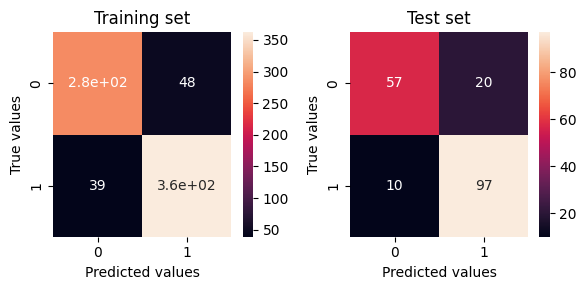

In [25]:
# Step 4. Repeat step 3 for the second model. 2 marks.

# Add your code here.

from sklearn.svm import SVC
from sklearn.svm import LinearSVC
#svc_model = SVC(probability=True, random_state=0)
#svc_model = SVC(kernel='rbf', probability=True, random_state=0)
svc_model = LinearSVC(dual=False, random_state=0)
svc_model.fit(X_train, y_train)
EvaluateModel(svc_model, X_train, X_test, y_train, y_test)


In [9]:
# Step 5. Repeat step 3 for the third model. 2 marks.

# Add your code here.



_Step 6. Provide a brief discussion on why you selected particular models, how the performance varied between models, which model you believe is the most generalizable, and any issues or problems you encountered during the assignment (200 words max). 2 mark._

**Add your text here**